# Prediction with Machine Learning HW2
## Mukhamejan Assan

Business: Your task will be to help a company operating small and mid-size apartments hosting 2-6 guests. The company is set to price their new apartments not on the market. 

Build a price prediction model similarly to how we did in our case study for London. 

Discuss your modeling decisions and compare your results to those of the case study. 


## Getting the data

In [49]:
import pandas as pd 

df = pd.read_csv('listings.csv')

## EDA
### The size

In [50]:
df.shape 

(11056, 75)

### The variables, their description, and type

In [51]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20221227164102,2022-12-27,previous scrape,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,...,4.85,4.53,4.68,00000957568,f,7,7,0,0,0.24
1,10990,https://www.airbnb.com/rooms/10990,20221227164102,2022-12-28,city scrape,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,...,4.89,4.77,4.74,00001070920,f,7,7,0,0,0.50
2,10993,https://www.airbnb.com/rooms/10993,20221227164102,2022-12-28,city scrape,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,...,4.98,4.84,4.78,00000957080,f,7,7,0,0,0.70
3,10995,https://www.airbnb.com/rooms/10995,20221227164102,2022-12-28,city scrape,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,...,4.89,4.81,4.81,00000957422,t,7,7,0,0,0.19
4,27262,https://www.airbnb.com/rooms/27262,20221227164102,2022-12-27,city scrape,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,...,4.95,4.67,4.61,00000957579,f,7,7,0,0,0.15


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11056 entries, 0 to 11055
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11056 non-null  int64  
 1   listing_url                                   11056 non-null  object 
 2   scrape_id                                     11056 non-null  int64  
 3   last_scraped                                  11056 non-null  object 
 4   source                                        11056 non-null  object 
 5   name                                          11054 non-null  object 
 6   description                                   11018 non-null  object 
 7   neighborhood_overview                         7087 non-null   object 
 8   picture_url                                   11056 non-null  object 
 9   host_id                                       11056 non-null 

In [13]:
features = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [12]:
target = ['price']

In [15]:
df[target]

,price
0,$81.00
1,$75.00
2,$60.00
3,$42.00
4,$75.00
...,...
11051,$56.00
11052,$58.00
11053,$129.00
11054,$46.00


In [11]:
df.isna().sum().sum()
# a lot of missing values ):

77284

<AxesSubplot:>

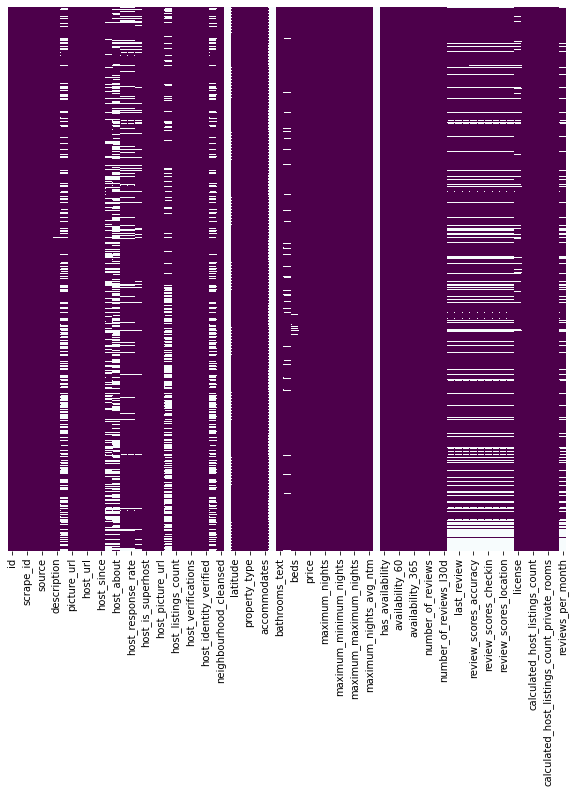

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r', ax=ax)

<AxesSubplot:title={'center':'Share of the missing values >0'}>

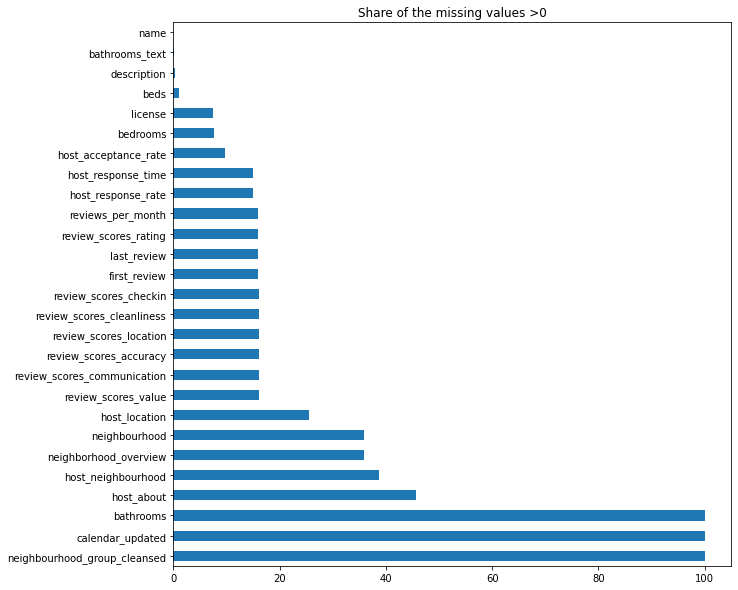

In [46]:
na_share = df.isnull().mean()*100
fig, ax = plt.subplots(figsize=(10,10))    
na_share[na_share>0].sort_values(ascending=False).plot.barh(title = 'Share of the missing values >0')